# **Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Analysing the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

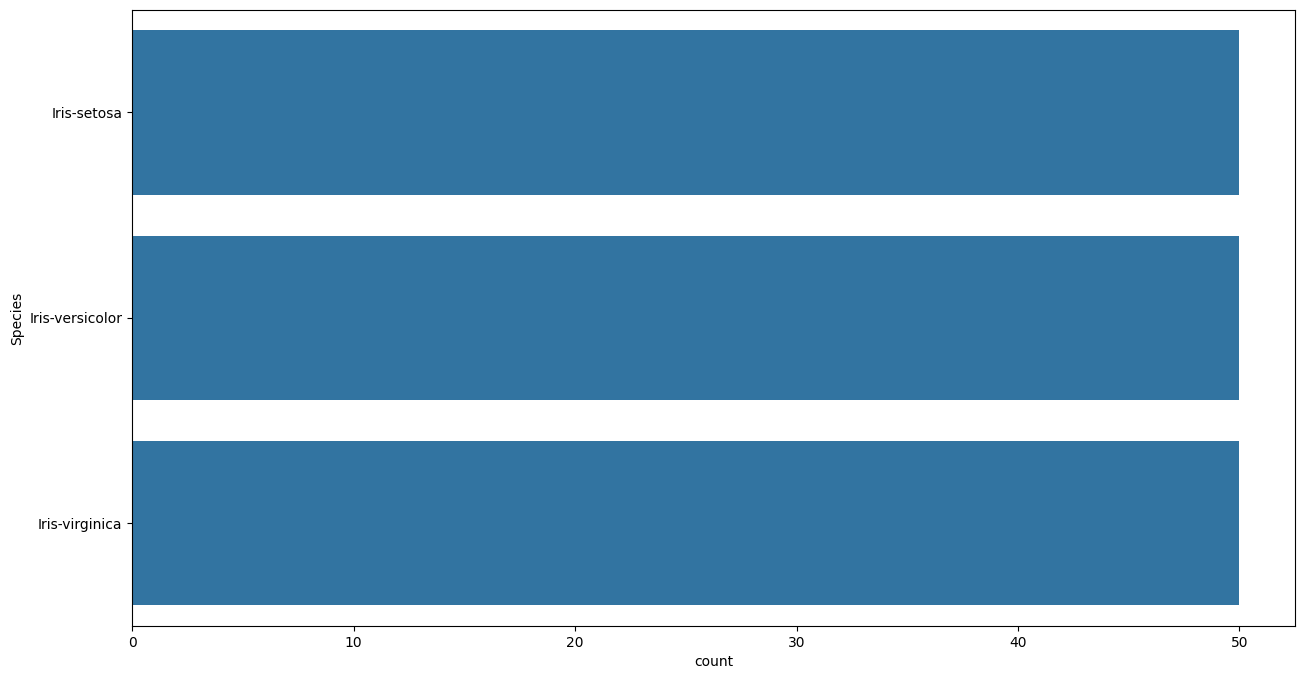

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df["Species"])
plt.show()

<Axes: >

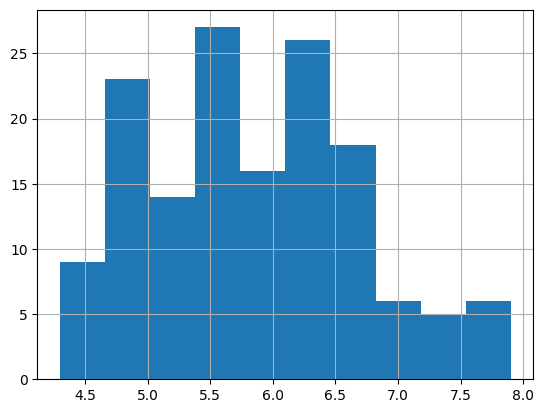

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

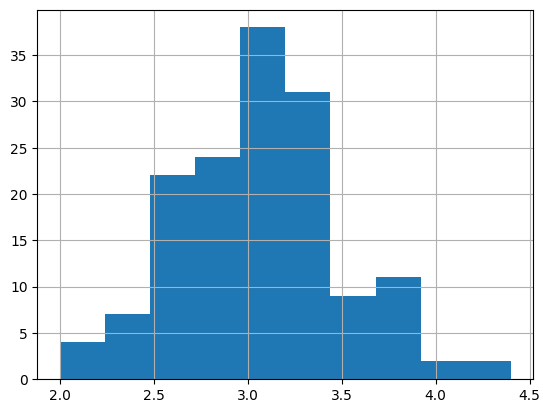

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

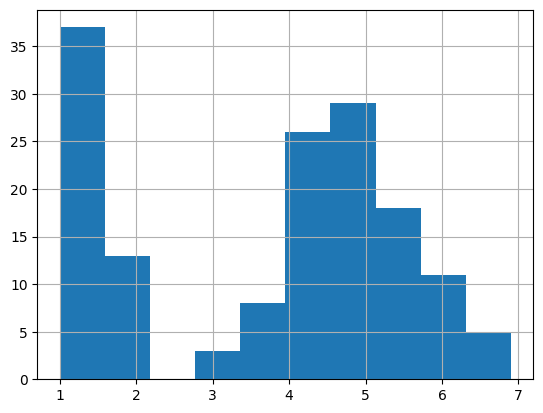

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

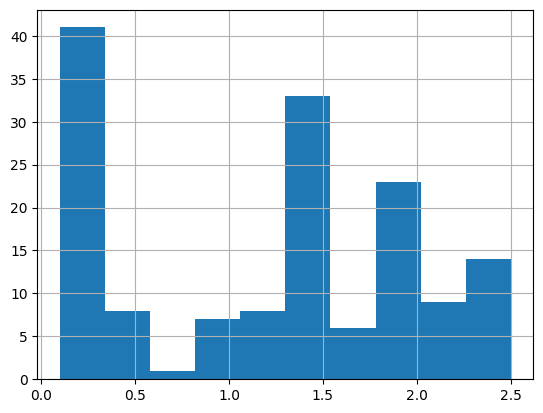

In [ ]:
df['PetalWidthCm'].hist()

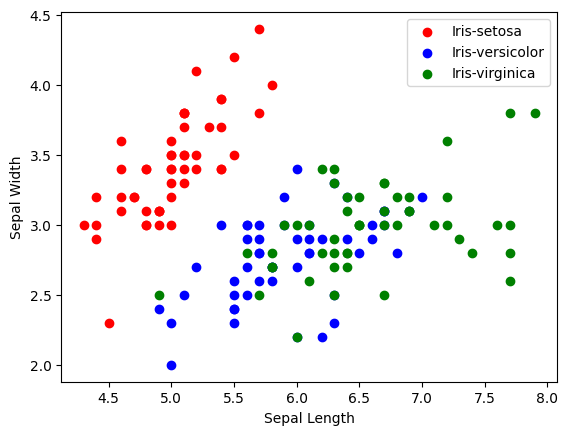

In [ ]:
colors = ['red','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


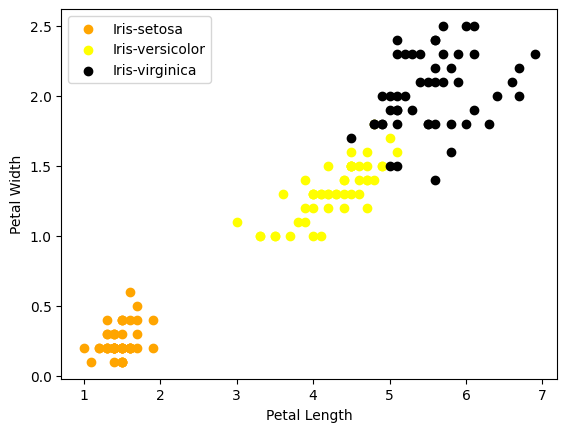

In [ ]:
colors = ['orange','yellow','black']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x = df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

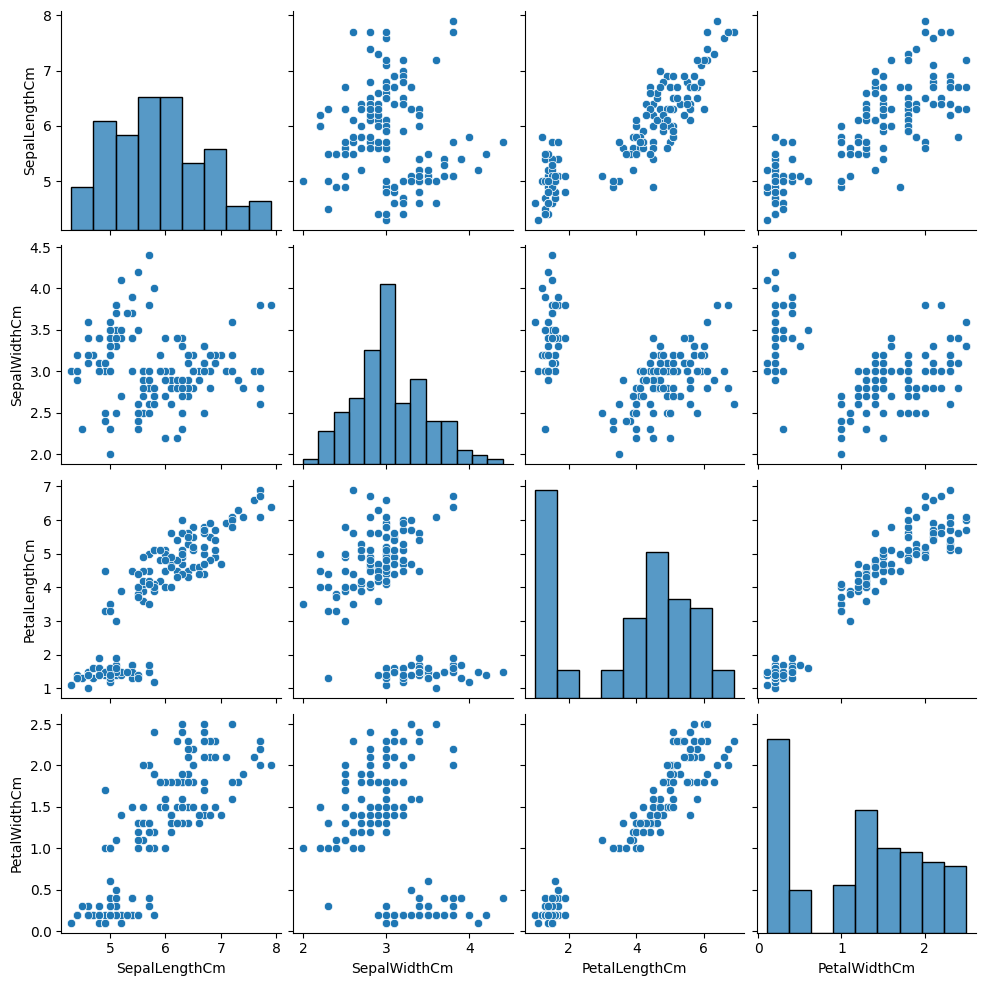

In [ ]:
#Visualising the entire dataset
sns.pairplot(df)

<ipython-input-261-d5ce45dd55e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


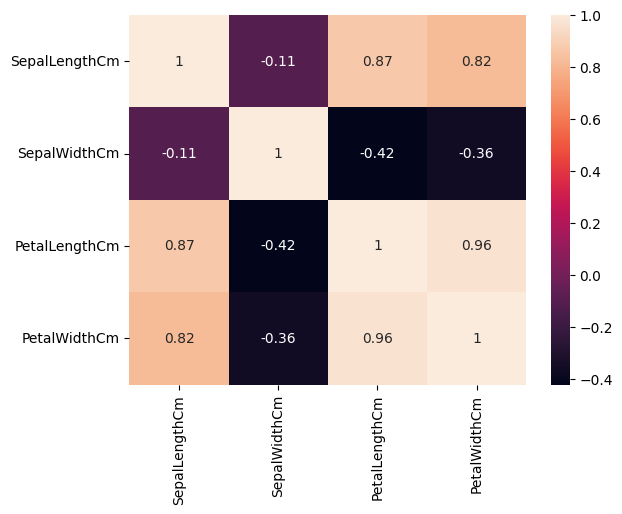

In [ ]:
#Checking the correlation between columns
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

# **Data Preprocessing**

In [ ]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Model Training**

In [ ]:
#Seperating feature and target columns
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#Creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
pred_train = svm_model.predict(X_train)
pred_test = svm_model.predict(X_test)

# **Classification System**

In [ ]:
# Install necessary libraries
!pip install ipywidgets

In [ ]:
# Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Function to predict species
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Predict species using SVM model
    prediction = svm_model.predict([[sepal_length, sepal_width, petal_length, petal_width]])
    # Get the species name
    species_name = df.Species[prediction[0]]
    return species_name

In [ ]:
# Create input widgets
sepal_length_input = widgets.FloatText(description="Sepal Length:")
sepal_width_input = widgets.FloatText(description="Sepal Width:")
petal_length_input = widgets.FloatText(description="Petal Length:")
petal_width_input = widgets.FloatText(description="Petal Width:")

In [ ]:
# Create a button widget
predict_button = widgets.Button(description="Predict")

In [ ]:
# Function to handle button click event
def on_predict_button_clicked(b):
    species_name = predict_species(sepal_length_input.value, sepal_width_input.value, petal_length_input.value, petal_width_input.value)
    print(f"The predicted species is: {species_name}")

In [ ]:
# Attach click event handler to the button
predict_button.on_click(on_predict_button_clicked)

In [ ]:
# Display widgets
display(sepal_length_input)
display(sepal_width_input)
display(petal_length_input)
display(petal_width_input)
display(predict_button)

FloatText(value=0.0, description='Sepal Length:')

FloatText(value=0.0, description='Sepal Width:')

FloatText(value=0.0, description='Petal Length:')

FloatText(value=0.0, description='Petal Width:')

Button(description='Predict', style=ButtonStyle())

The predicted species is: Iris-setosa
The predicted species is: Iris-setosa
